# Dados Estatísticos e Geográficos dos Municípios de Minas Gerais

**Descrição**: Este projeto utiliza um conjunto de dados contendo informações estatísticas e geográficas detalhadas dos municípios do estado de Minas Gerais, Brasil. O objetivo principal é analisar e extrair insights úteis sobre a distribuição populacional, indicadores socioeconômicos e outras características relevantes, permitindo uma melhor compreensão das disparidades regionais e potenciais estratégias de desenvolvimento. Além disso, é preciso realizar um pré-processamento para que o dataset possa ser utilizado na atividade 03 da disciplina de Data Science do projeto ZL Academy.

**Dicionário das colunas**: \
<sub>O nome das colunas abaixo estão de acordo com os dados depois do `Pré-Processamento`⁴.</sub>

- `municipio`: Nome do município localizado no estado de Minas Gerais.  
- `cod_municipio`: Código único de identificação do município.  
- `gentilico`: Denominação usada para se referir aos habitantes do município.  
- `prefeito_2021`: Nome do prefeito em exercício no ano de 2021.  
- `area_territorial_km2`: Área territorial do município em quilômetros quadrados.  
- `populacao_residente`: Número estimado de habitantes residentes no município.  
- `densidade_demografica`: Relação entre a população residente e a área territorial (habitantes por km²).  
- `escolarizacao_6_14_anos`: Percentual de crianças e adolescentes de 6 a 14 anos regularmente matriculados na escola.  
- `IDHM`: Índice de Desenvolvimento Humano Municipal, que mede o progresso social, econômico e educacional.  
- `mortalidade_infantil`: Taxa de mortalidade infantil (número de óbitos de crianças menores de 1 ano por mil nascidos vivos).  
- `receitas_brutas`: Total de receitas arrecadadas pelo município, em reais.  
- `despesas_brutas`: Total de despesas executadas pelo município, em reais.  
- `PIB_per_capita`: Produto Interno Bruto (PIB) per capita do município, em reais (ano de 2021).

**Fonte dos Dados**: https://www.ibge.gov.br/cidades-e-estados/mg.html

---

## 1. Configuração do Ambiente

---

**Objetivo**: Configurar e preparar o ambiente de trabalho para análise exploratória de dados.

### 1.1. Importação de Bibliotecas

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import html
import os
# from google.colab import files, drive

from unidecode import unidecode
import re

### 1.2. Montar Google Drive

In [7]:
# Apenas para a utilização no Google Colab

# drive.mount('/content/drive')

## 2. Carregamento dos Dados

---

**Objetivo**: Importar os dados brutos para o ambiente de análise, assegurando a leitura correta do dataset e verificando sua integridade estrutural, como a presença de colunas, linhas e valores nulos.

### 2.1. Caminho e Carregamento

In [8]:
print(os.getcwd())

c:\Users\Ademar Castro\Desktop\Dev\Projetos\mg-municipios-eda\notebooks


In [9]:
path = r'../data/'

print(os.listdir(path))

['crimes_violentos_2024.csv', 'municipios_habitantes.csv', 'municipios_habitantes_processado.csv']


In [10]:
# path = '/content/drive/MyDrive/ZL Academy/Data Science & Business Intelligence/atividade-03/'

path = r'../data/'
df_mg_municipios = pd.read_csv(path + 'municipios_habitantes.csv', header=1)

**Explicação**:

*   **path**: Define o diretório onde o arquivo CSV está localizado.
*   **df_mg_municipios**: Carrega os dados do arquivo CSV no DataFrame df_mg_municipios. A opção header=1 é usada para informar que a primeira linha após o cabeçalho é a que contém os nomes das colunas.

### 2.2. Visualização Inicial

In [11]:
df_mg_municipios.head()

,Munic&iacute;pio [-],C&oacute;digo [-],Gent&iacute;lico [-],Prefeito [2021],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],PIB per capita - R$ [2021],Unnamed: 13
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26,NaN
1,Abaet&eacute;,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10,NaN
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86,NaN
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96,0.630,-,29827818.55,27583150.37,16247.06,NaN
4,A&ccedil;ucena,3100500,a&ccedil;ucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,-,43297064.77,44079763.29,17888.20,NaN


In [12]:
df_mg_municipios.tail()

,Munic&iacute;pio [-],C&oacute;digo [-],Gent&iacute;lico [-],Prefeito [2021],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],PIB per capita - R$ [2021],Unnamed: 13
849,Virgol&acirc;ndia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51,NaN
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87,NaN
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98,0.669,-,35926989.41,35075032.54,26633.91,NaN
852,Wenceslau Braz,3172202,wenceslauense,EDVALDO JOSE BITENCOURT,102.487,2356,22.99,98.3,0.678,-,25869030.43,25095426.50,13011.59,NaN
853,"<table class=""fontes-container""><tr><th>Notas:...",2023</td></tr><tr><td>População residente: Ce...,Censo Demográfico 2010</td></tr><tr><td>IDHM ...,Departamento de Informática do Sistema Único ...,DF,[2023]. Disponível em: https://siconfi.tesour...,Contas anuais. Receitas orçamentárias realiza...,DF,[2023]. Disponível em: https://siconfi.tesour...,Contas anuais. Receitas orçamentárias realiza...,em parceria com os Órgãos Estaduais de Estatí...,Secretarias Estaduais de Governo e Superinten...,NaN,NaN



**Análise**: A nomenclatura das colunas precisa ser revista, a última linha e coluna do dataset é dispensável. Há entidades de caracteres HTML presentes em todas as celulas do dataset que precisam ser tratadas.


## 3. Exploração Inicial

---


**Objetivo**: Visualizar o dataframe para entender a sua estrutura e realizar uma análise rápida.

### 3.1. Estatísticas Descritivas

In [13]:
df_mg_municipios.describe()

,PIB per capita - R$ [2021],Unnamed: 13
count,853.000000,0.0
mean,30731.424045,NaN
std,54335.698411,NaN
min,6983.080000,NaN
25%,14172.890000,NaN
50%,19723.720000,NaN
75%,30214.480000,NaN
max,920833.970000,NaN


In [14]:
df_mg_municipios.dtypes

Munic&iacute;pio [-]                                                                       object
C&oacute;digo [-]                                                                          object
Gent&iacute;lico [-]                                                                       object
Prefeito [2021]                                                                            object
&Aacute;rea Territorial - km&sup2; [2022]                                                  object
Popula&ccedil;&atilde;o residente - pessoas [2022]                                         object
Densidade demogr&aacute;fica - hab/km&sup2; [2022]                                         object
Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010]                object
IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010]     object
Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022]                         object
Total de receitas br

**Análise**: Apenas a coluna `PIB per capita - R$ [2021]` é do tipo numérica, ou seja, preciso analisar se há a necessidade de trasnformar colunas para o tipo numerico.

**Insights**: `PIB per capita - R$ [2021]`
* Média do PIB: O valor médio é `R$ 30.731,42`.
* Desvio padrão: O desvio padrão de `R$ 54.335,70` indica uma grande variação entre os valores do PIB per capita. Isso sugere que há municípios com um PIB muito superior ao valor médio, o que pode indicar disparidades econômicas significativas.
* Valor mínimo de PIB per capita: O valor mais baixo registrado foi `R$ 6.983,08`, indicando que há municípios com uma situação econômica muito mais baixa em relação à média estadual.
* Valor máximo de PIB per capita: O valor mais alto foi `R$ 920.833,97`, indicando que existem municípios com um PIB per capita extremamente alto, possivelmente refletindo grandes centros econômicos ou regiões com atividades econômicas muito intensas (como mineração, agronegócio, ou indústrias de alta tecnologia).
* Mediana (50%): A mediana de `R$ 19.723,72` divide os municípios ao meio. Isso significa que metade dos municípios tem um PIB per capita abaixo desse valor e a outra metade acima.
* Quartis: O primeiro quartil (25%) é de `R$ 14.172,89`, indicando que 25% dos municípios têm um PIB per capita abaixo desse valor. O terceiro quartil (75%) é de `R$ 30.214,48`, mostrando que 25% dos municípios estão acima desse valor.`

**Conclusão**: A grande diferença entre o valor mínimo e máximo, aliado ao alto desvio padrão, sugere uma desigualdade significativa na distribuição do PIB per capita no estado. Enquanto alguns municípios apresentam PIBs muito altos, outros estão bem abaixo da média, o que pode refletir desigualdade de acesso a recursos, infraestrutura, e oportunidades econônomicas.




### 3.2. Verificação de Valores Ausentes

In [15]:
df_mg_municipios.isnull().sum()

Munic&iacute;pio [-]                                                                        0
C&oacute;digo [-]                                                                           0
Gent&iacute;lico [-]                                                                        0
Prefeito [2021]                                                                             0
&Aacute;rea Territorial - km&sup2; [2022]                                                   0
Popula&ccedil;&atilde;o residente - pessoas [2022]                                          0
Densidade demogr&aacute;fica - hab/km&sup2; [2022]                                          0
Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010]                 0
IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010]      0
Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022]                          0
Total de receitas brutas realizadas - R$ [2023]             

**Análise**: Preciso tratar a linha com valor nulo na coluna `PIB per capita - R$ [2021]` e também remover a coluna 13.

### 3.3. Distribuição de Dados

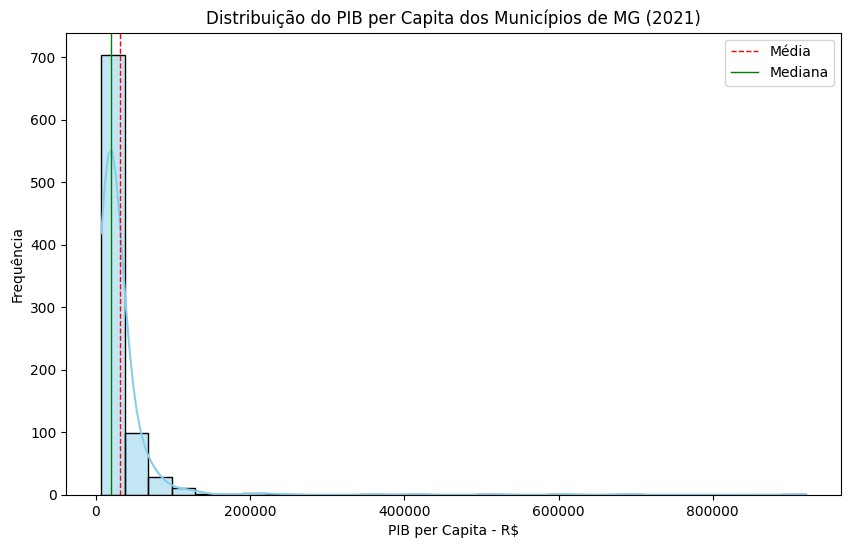

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_mg_municipios['PIB per capita - R$ [2021]'], bins=30, color='skyblue', kde=True)
plt.title('Distribuição do PIB per Capita dos Municípios de MG (2021)')
plt.xlabel('PIB per Capita - R$')
plt.ylabel('Frequência')
plt.axvline(df_mg_municipios['PIB per capita - R$ [2021]'].mean(), color='red', linestyle='--', linewidth=1, label='Média')
plt.axvline(df_mg_municipios['PIB per capita - R$ [2021]'].median(), color='green', linestyle='-', linewidth=1, label='Mediana')
plt.legend()
plt.show()

## 4. Pré-Processamento de Dados

---

**Objetivo**: Preparar os dados de forma que eles se ajustem aos requisitos do modelo ou análise, além de melhorar a performance e a precisão dos modelos subsequentes.

### 4.1. Limpeza e Transformação de Dados

In [17]:
df_mg_municipios[df_mg_municipios['PIB per capita - R$ [2021]'].isnull()]

,Munic&iacute;pio [-],C&oacute;digo [-],Gent&iacute;lico [-],Prefeito [2021],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],PIB per capita - R$ [2021],Unnamed: 13
853,"<table class=""fontes-container""><tr><th>Notas:...",2023</td></tr><tr><td>População residente: Ce...,Censo Demográfico 2010</td></tr><tr><td>IDHM ...,Departamento de Informática do Sistema Único ...,DF,[2023]. Disponível em: https://siconfi.tesour...,Contas anuais. Receitas orçamentárias realiza...,DF,[2023]. Disponível em: https://siconfi.tesour...,Contas anuais. Receitas orçamentárias realiza...,em parceria com os Órgãos Estaduais de Estatí...,Secretarias Estaduais de Governo e Superinten...,NaN,NaN


**Análise**: Como é possível visualizar, não há a necessidade de se preocupar com esse valor nulo, pois a última linha inteira é descartável.

In [18]:
df_mg_municipios_v2 = df_mg_municipios.iloc[:-1, :-1]
df_mg_municipios_v2

,Munic&iacute;pio [-],C&oacute;digo [-],Gent&iacute;lico [-],Prefeito [2021],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],PIB per capita - R$ [2021]
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26
1,Abaet&eacute;,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96,0.630,-,29827818.55,27583150.37,16247.06
4,A&ccedil;ucena,3100500,a&ccedil;ucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,-,43297064.77,44079763.29,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virgin&oacute;polis,3171808,virginopolitano,BOBY CHARLES DAS DORES LE&Atilde;O,439.878,10314,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98
849,Virgol&acirc;ndia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98,0.669,-,35926989.41,35075032.54,26633.91


**Explicação**:

`df.iloc[:-1, :-1]`

*   `:-1` Seleciona todas as linhas, menos a última.
*   `:-1` Seleciona todas as colunas, exceto a última.

In [19]:
df_mg_municipios_v3 = df_mg_municipios_v2.rename(columns={
    "Munic&iacute;pio [-]": "municipio",
    "C&oacute;digo [-]": "cod_municipio", # Coluna de referência para o Dataset de Crimes Violentos
    "Gent&iacute;lico [-]": "gentilico",
    "Prefeito [2021]": "prefeito_2021",
    "&Aacute;rea Territorial - km&sup2; [2022]": "area_territorial_km2",
    "Popula&ccedil;&atilde;o residente - pessoas [2022]": "populacao_residente",
    "Densidade demogr&aacute;fica - hab/km&sup2; [2022]": "densidade_demografica",
    "Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010]": "escolarizacao_6_14_anos",
    "IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010]": "IDHM",
    "Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022]": "mortalidade_infantil",
    "Total de receitas brutas realizadas - R$ [2023]": "receitas_brutas",
    "Total de despesas brutas empenhadas - R$ [2023]": "despesas_brutas",
    "PIB per capita - R$ [2021]": "PIB_per_capita"
})

df_mg_municipios_v3

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26
1,Abaet&eacute;,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96,0.630,-,29827818.55,27583150.37,16247.06
4,A&ccedil;ucena,3100500,a&ccedil;ucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,-,43297064.77,44079763.29,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virgin&oacute;polis,3171808,virginopolitano,BOBY CHARLES DAS DORES LE&Atilde;O,439.878,10314,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98
849,Virgol&acirc;ndia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98,0.669,-,35926989.41,35075032.54,26633.91


**Explicação**: Troca os nomes das colunas do dataset.

In [20]:
def substituir_entidades_html(celula):
  if isinstance(celula, str):
    return html.unescape(celula)
  return celula

df_mg_municipios_v4 = df_mg_municipios_v3.applymap(substituir_entidades_html)

df_mg_municipios_v4

C:\Users\Ademar Castro\AppData\Local\Temp\ipykernel_13388\2174031040.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mg_municipios_v4 = df_mg_municipios_v3.applymap(substituir_entidades_html)


,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26
1,Abaeté,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96,0.630,-,29827818.55,27583150.37,16247.06
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,-,43297064.77,44079763.29,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virginópolis,3171808,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98
849,Virgolândia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98,0.669,-,35926989.41,35075032.54,26633.91


**Explicação**: Remove as entidades de caractere HTML do dataset e as substitui pelo seu correspondente na linguagem comum.

In [21]:
df_mg_municipios_v4.dtypes

municipio                   object
cod_municipio               object
gentilico                   object
prefeito_2021               object
area_territorial_km2        object
populacao_residente         object
densidade_demografica       object
escolarizacao_6_14_anos     object
IDHM                        object
mortalidade_infantil        object
receitas_brutas             object
despesas_brutas             object
PIB_per_capita             float64
dtype: object

**Análise**: Todas as colunas abaixo deveriam ser do tipo numérica.

1. `area_territorial_km2`
2. `populacao_residente`
3. `densidade_demografica`
4. `escolarizacao_6_14_anos`
5. `IDHM`
6. `mortalidade_infantil`
7. `receitas_brutas`
8. `despesas_brutas`

In [22]:
df_mg_municipios_v5 = df_mg_municipios_v4.copy()

colunas_para_converter = [
    'area_territorial_km2',
    'populacao_residente',
    'densidade_demografica',
    'escolarizacao_6_14_anos',
    'IDHM',
    'mortalidade_infantil',
    'receitas_brutas',
    'despesas_brutas'
    ]

# Converter colunas selecionadas para numérico
for col in colunas_para_converter:
  df_mg_municipios_v5[col] = pd.to_numeric(df_mg_municipios_v4[col], errors='coerce')

df_mg_municipios_v5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   municipio                853 non-null    object 
 1   cod_municipio            853 non-null    object 
 2   gentilico                853 non-null    object 
 3   prefeito_2021            853 non-null    object 
 4   area_territorial_km2     853 non-null    float64
 5   populacao_residente      853 non-null    int64  
 6   densidade_demografica    853 non-null    float64
 7   escolarizacao_6_14_anos  853 non-null    float64
 8   IDHM                     853 non-null    float64
 9   mortalidade_infantil     548 non-null    float64
 10  receitas_brutas          853 non-null    float64
 11  despesas_brutas          853 non-null    float64
 12  PIB_per_capita           853 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 86.8+ KB


**Explicação**:


*   A lista `colunas_para_converter` contém os nomes das colunas que você deseja converter.
*   O loop percorre apenas as colunas na lista personalizada e aplica `pd.to_numeric` com `errors='coerce'` para tratar valores inválidos como `NaN`.



**Análise**: Há apenas 548 celulas preenchidas de 853 na coluna `mortalidade_infantil`.

In [23]:
linhas_valores_nulos = df_mg_municipios_v5[df_mg_municipios_v5['mortalidade_infantil'].isnull()]
linhas_valores_nulos

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96.0,0.630,NaN,29827818.55,27583150.37,16247.06
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,NaN,43297064.77,44079763.29,17888.20
6,Água Comprida,3100708,água-compridense,ALEXANDRE DE ALMEIDA SILVA,492.167,2108,4.28,95.2,0.675,NaN,41473621.63,32885423.19,115725.51
7,Aguanil,3100807,aguanilense,JOSE MARCIO DE OLIVEIRA,232.091,4357,18.77,97.4,0.663,NaN,36324373.19,32465532.36,20762.54
9,Águas Vermelhas,3101003,águas-vermelhense,NILSON FRANCISCO CAMPOS,1256.607,14037,11.17,93.3,0.601,NaN,70885447.15,66493180.75,17329.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Vieiras,3171402,vieirense,RICARDO CELLES MAIA,112.691,3700,32.83,99.2,0.668,NaN,36875646.04,35322802.15,14974.51
845,Mathias Lobato,3171501,matiense,KARLA PESSAMILIO SOUZA LOPES,172.297,3038,17.63,96.8,0.612,NaN,49086099.88,38768973.13,13915.37
846,Virgem da Lapa,3171600,virgem-lapense,DIOGENES TIMO SILVA,868.914,11804,13.58,92.1,0.610,NaN,70294534.30,55940540.12,9585.82
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98.0,0.669,NaN,35926989.41,35075032.54,26633.91


In [24]:
# Calcula a média dos valores não nulos da coluna 'mortalidade_infantil'
media_mortalidade_infantil = df_mg_municipios_v5['mortalidade_infantil'].mean()

# Criar uma nova versão do dataset
df_mg_municipios_v6 = df_mg_municipios_v5.copy()

# Substitui os valores nulos pela média calculada na coluna 'mortalidade_infantil'
df_mg_municipios_v6['mortalidade_infantil'].fillna(media_mortalidade_infantil, inplace=True)

df_mg_municipios_v6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   municipio                853 non-null    object 
 1   cod_municipio            853 non-null    object 
 2   gentilico                853 non-null    object 
 3   prefeito_2021            853 non-null    object 
 4   area_territorial_km2     853 non-null    float64
 5   populacao_residente      853 non-null    int64  
 6   densidade_demografica    853 non-null    float64
 7   escolarizacao_6_14_anos  853 non-null    float64
 8   IDHM                     853 non-null    float64
 9   mortalidade_infantil     853 non-null    float64
 10  receitas_brutas          853 non-null    float64
 11  despesas_brutas          853 non-null    float64
 12  PIB_per_capita           853 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 86.8+ KB


C:\Users\Ademar Castro\AppData\Local\Temp\ipykernel_13388\4040365976.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mg_municipios_v6['mortalidade_infantil'].fillna(media_mortalidade_infantil, inplace=True)


**Explicação**:

1. **`df_mg_municipios_v5['mortalidade_infantil'].mean()`**:
   - Este comando calcula a média de todos os valores não nulos na coluna **`mortalidade_infantil`**. A função `mean()` ignora automaticamente os valores nulos (NaN) ao calcular a média.

3. **`df_mg_municipios_v6['mortalidade_infantil'].fillna(media_mortalidade_infantil, inplace=True)`**:
   - O comando **`fillna()`** é usado para substituir os valores nulos em uma coluna específica. Neste caso, ele substitui os valores nulos na coluna **`mortalidade_infantil`** pela média calculada anteriormente. A opção **`inplace=True`** garante que a modificação seja feita diretamente na cópia do DataFrame **`df_mg_municipios_v6`**.


In [25]:
df_mg_municipios_v6

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.040000,4.420295e+07,4.069703e+07,25174.26
1,Abaeté,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.350000,1.139298e+08,1.081102e+08,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.960000,6.837065e+07,5.968581e+07,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96.0,0.630,18.718285,2.982782e+07,2.758315e+07,16247.06
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,18.718285,4.329706e+07,4.407976e+07,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virginópolis,3171808,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314,23.45,98.2,0.675,7.630000,5.930132e+07,5.766449e+07,17587.98
849,Virgolândia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.440000,3.537019e+07,2.957472e+07,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.010000,1.753766e+08,1.953972e+08,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98.0,0.669,18.718285,3.592699e+07,3.507503e+07,26633.91


In [26]:
df_mg_municipios_v2

,Munic&iacute;pio [-],C&oacute;digo [-],Gent&iacute;lico [-],Prefeito [2021],&Aacute;rea Territorial - km&sup2; [2022],Popula&ccedil;&atilde;o residente - pessoas [2022],Densidade demogr&aacute;fica - hab/km&sup2; [2022],Escolariza&ccedil;&atilde;o &lt;span&gt;6 a 14 anos&lt;/span&gt; - % [2010],IDHM &lt;span&gt;&Iacute;ndice de desenvolvimento humano municipal&lt;/span&gt; [2010],Mortalidade infantil - &oacute;bitos por mil nascidos vivos [2022],Total de receitas brutas realizadas - R$ [2023],Total de despesas brutas empenhadas - R$ [2023],PIB per capita - R$ [2021]
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26
1,Abaet&eacute;,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96,0.630,-,29827818.55,27583150.37,16247.06
4,A&ccedil;ucena,3100500,a&ccedil;ucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,-,43297064.77,44079763.29,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virgin&oacute;polis,3171808,virginopolitano,BOBY CHARLES DAS DORES LE&Atilde;O,439.878,10314,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98
849,Virgol&acirc;ndia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98,0.669,-,35926989.41,35075032.54,26633.91


In [27]:
df_mg_municipios_v6.describe()

,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
count,853.000000,8.530000e+02,853.000000,853.000000,853.000000,853.000000,8.530000e+02,8.530000e+02,853.000000
mean,687.589673,2.407971e+04,69.086928,97.443494,0.667878,18.718285,1.629692e+08,1.537210e+08,30731.424045
std,965.848936,9.435278e+04,314.424841,1.688276,0.049637,11.363969,7.874054e+08,7.291716e+08,54335.698411
min,3.565000,8.330000e+02,1.210000,83.900000,0.529000,2.430000,2.497572e+07,2.006520e+07,6983.080000
25%,196.735000,4.639000e+03,12.170000,96.700000,0.633000,12.420000,3.658198e+07,3.364044e+07,14172.890000
50%,363.828000,8.048000e+03,22.090000,97.700000,0.670000,18.718285,4.897474e+07,4.570821e+07,19723.720000
75%,727.894000,1.728500e+04,43.760000,98.500000,0.702000,18.718285,9.593015e+07,9.066841e+07,30214.480000
max,10727.097000,2.315560e+06,6988.180000,100.000000,0.813000,100.000000,1.728002e+10,1.680285e+10,920833.970000


**Análise**: É possível observar uma inconsistência na transformação dos dados nas seguintes colunas:

1.   `mortalidade_infantil`: Muitas casas decimais depois da virgula, o melhor seria apenas 2 casas.
2.   `populacao_residente`: Valores altos exibidos em notação científica.
2.   `receitas_brutas`: O valor que deveria ser 44202945.98 foi transformado em 4.420295e+07.
3.   `despesas_brutas`: O valor que deveria ser 40697025.21 foi transformado em 4.069703e+07.

In [28]:
df_mg_municipios_v7 = df_mg_municipios_v6.copy()
df_mg_municipios_v7['mortalidade_infantil'] = df_mg_municipios_v6['mortalidade_infantil'].round(2)
df_mg_municipios_v7

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272,7.12,98.3,0.689,37.04,4.420295e+07,4.069703e+07,25174.26
1,Abaeté,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675,12.48,99.8,0.698,14.35,1.139298e+08,1.081102e+08,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927,29.60,97.4,0.654,15.96,6.837065e+07,5.968581e+07,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909,38.37,96.0,0.630,18.72,2.982782e+07,2.758315e+07,16247.06
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943,10.97,96.7,0.610,18.72,4.329706e+07,4.407976e+07,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virginópolis,3171808,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314,23.45,98.2,0.675,7.63,5.930132e+07,5.766449e+07,17587.98
849,Virgolândia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552,16.20,98.4,0.620,44.44,3.537019e+07,2.957472e+07,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160,160.92,97.5,0.709,23.01,1.753766e+08,1.953972e+08,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443,21.61,98.0,0.669,18.72,3.592699e+07,3.507503e+07,26633.91


**Explicação**:

1. **`df_mg_municipios_v7['mortalidade_infantil'] = df_mg_municipios_v6['mortalidade_infantil'].round(2)`**:
   - Este comando arredonda os valores da coluna **`mortalidade_infantil`** para 2 casas decimais no DataFrame **`df_mg_municipios_v7`**. O arredondamento é feito usando o método `round(2)`.


In [29]:
df_mg_municipios_v8 = df_mg_municipios_v7.copy()
df_mg_municipios_v8['populacao_residente'] = df_mg_municipios_v7['populacao_residente'].apply(lambda x: '{:.2f}'.format(x))
df_mg_municipios_v8['receitas_brutas'] = df_mg_municipios_v7['receitas_brutas'].apply(lambda x: '{:.2f}'.format(x))
df_mg_municipios_v8['despesas_brutas'] = df_mg_municipios_v7['despesas_brutas'].apply(lambda x: '{:.2f}'.format(x))
df_mg_municipios_v8

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272.00,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26
1,Abaeté,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675.00,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927.00,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909.00,38.37,96.0,0.630,18.72,29827818.55,27583150.37,16247.06
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943.00,10.97,96.7,0.610,18.72,43297064.77,44079763.29,17888.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virginópolis,3171808,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314.00,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98
849,Virgolândia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552.00,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160.00,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443.00,21.61,98.0,0.669,18.72,35926989.41,35075032.54,26633.91


**Explicação**:

1. **Formatação das colunas `populacao_residente`, `receitas_brutas` e `despesas_brutas`**:
   - O comando **`apply(lambda x: '{:.2f}'.format(x))`** é usado nas duas colunas para formatar os valores numéricos para 2 casas decimais. Isso converte cada valor para uma string formatada.


**Relato de Uso**: Após utilizar o dataset, observei que a coluna `cod_municipio` não condiz com os códigos que estão em outro dataset que utilizo, ou seja, preciso adaptar essa coluna para o padrão da outra. Além disso, notei que seria bom adicionar uma nova coluna com os nomes dos municípios sem nenhum caractere especial e em caixa alta.

In [30]:
df_cv_2024 = pd.read_csv(path + 'crimes_violentos_2024.csv', sep=';')
df_cv_2024 = df_cv_2024[['municipio', 'cod_municipio']]

In [31]:
# Padronizar nomes dos municípios e remover caracteres especiais
def clean_municipio_name(name):
    # Remover acentos e caracteres especiais, e substituir por espaço
    name = unidecode(name)  # Remove os acentos
    name = re.sub(r'[^A-Za-z0-9\s]+', ' ', name)  # Substitui caracteres especiais por espaço
    return name.strip().upper()  # Remover espaços extras e deixar em maiúsculo

# Aplicando a limpeza nos DataFrames
df_mg_municipios_v8['municipio_upper'] = df_mg_municipios_v8['municipio'].apply(clean_municipio_name)
df_cv_2024['municipio'] = df_cv_2024['municipio'].apply(clean_municipio_name)


In [32]:
df_cv_2024

,municipio,cod_municipio
0,ABADIA DOS DOURADOS,310010
1,ABAETE,310020
2,ABRE CAMPO,310030
3,ACAIACA,310040
4,ACUCENA,310050
...,...,...
88707,VIRGOLANDIA,317190
88708,VISCONDE DO RIO BRANCO,317200
88709,VOLTA GRANDE,317210
88710,WENCESLAU BRAZ,317220


In [33]:
# Criar um DataFrame único com os códigos dos municípios no df_cv_2024
df_cv_2024_unique = (
    df_cv_2024[['municipio', 'cod_municipio']]
    .drop_duplicates(subset=['municipio'])  # Remove duplicidades por município
    .reset_index(drop=True)  # Reseta o índice para melhor organização
)

df_cv_2024_unique

,municipio,cod_municipio
0,ABADIA DOS DOURADOS,310010
1,ABAETE,310020
2,ABRE CAMPO,310030
3,ACAIACA,310040
4,ACUCENA,310050
...,...,...
848,VIRGINOPOLIS,317180
849,VIRGOLANDIA,317190
850,VISCONDE DO RIO BRANCO,317200
851,VOLTA GRANDE,317210


In [34]:
df_mg_municipios_v8

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
0,Abadia dos Dourados,3100104,abadiense,WANDERLEI LEMES SANTOS,880.461,6272.00,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26,ABADIA DOS DOURADOS
1,Abaeté,3100203,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675.00,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10,ABAETE
2,Abre Campo,3100302,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927.00,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86,ABRE CAMPO
3,Acaiaca,3100401,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909.00,38.37,96.0,0.630,18.72,29827818.55,27583150.37,16247.06,ACAIACA
4,Açucena,3100500,açucenense,RAULISSON MORAIS,815.422,8943.00,10.97,96.7,0.610,18.72,43297064.77,44079763.29,17888.20,ACUCENA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,Virginópolis,3171808,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314.00,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98,VIRGINOPOLIS
849,Virgolândia,3171907,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552.00,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51,VIRGOLANDIA
850,Visconde do Rio Branco,3172004,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160.00,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87,VISCONDE DO RIO BRANCO
851,Volta Grande,3172103,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443.00,21.61,98.0,0.669,18.72,35926989.41,35075032.54,26633.91,VOLTA GRANDE


In [35]:
# Remover a coluna 'cod_municipio' do DataFrame original
df_mg_municipios_v8 = df_mg_municipios_v8.drop(columns=['cod_municipio'], errors='ignore')

# Realizar o merge
df_mg_municipios_v9 = pd.merge(
    df_mg_municipios_v8,
    df_cv_2024_unique.rename(columns={'municipio': 'municipio_upper'}),  # Usar o DataFrame único para evitar duplicidades
    on='municipio_upper',
    how='left'  # Mantém todas as linhas de df_mg_municipios_v8
)

# Garantir que 'cod_municipio' seja um inteiro após o merge
df_mg_municipios_v9['cod_municipio'] = df_mg_municipios_v9['cod_municipio'].fillna(-1).astype(int)

# Tratar outros valores NaN em todas as colunas
df_mg_municipios_v9.fillna(
    {
        'municipio': 'Desconhecido',                # Texto padrão
        'gentilico': 'Desconhecido',                # Texto padrão
        'prefeito_2021': 'Não informado',           # Texto padrão
        'area_territorial_km2': 0.0,                # Valor padrão para áreas não informadas
        'populacao_residente': 0,                   # População padrão como zero
        'densidade_demografica': 0.0,               # Valor padrão para densidade
        'escolarizacao_6_14_anos': 0.0,             # Valor padrão para porcentagem de escolarização
        'IDHM': 0.0,                                # Valor padrão para índice
        'mortalidade_infantil': 0.0,                # Valor padrão para taxa
        'receitas_brutas': 0.0,                     # Valor padrão para receitas
        'despesas_brutas': 0.0,                     # Valor padrão para despesas
        'PIB_per_capita': 0.0,                      # Valor padrão para PIB per capita
        'municipio_upper': 'DESCONHECIDO',          # Texto padrão em caixa alta
    },
    inplace=True
)

# Reorganizar as colunas para que 'cod_municipio' fique após 'municipio'
cols = list(df_mg_municipios_v9.columns)
municipio_idx = cols.index('municipio')
cols.remove('cod_municipio')
cols.insert(municipio_idx + 1, 'cod_municipio')
df_mg_municipios_v9 = df_mg_municipios_v9[cols]

In [36]:
# Filtrar todas as linhas onde 'cod_municipio' é -1
cod_municipios_negativos = df_mg_municipios_v9[df_mg_municipios_v9['cod_municipio'] == -1]

# Exibir os resultados
cod_municipios_negativos

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
95,Brazópolis,-1,brazopolense,CARLOS ALBERTO MORAIS,367.688,14246.00,38.74,98.4,0.692,14.18,68374342.85,59496116.58,13786.69,BRAZOPOLIS
255,Dona Euzébia,-1,donaeuzebense ou donaeuzebiense,MANOEL FRANKLIN RODRIGUES,70.231,6093.00,86.76,98.7,0.701,55.56,36188889.67,34854747.47,16492.38,DONA EUZEBIA
533,Onça de Pitangui,-1,oncense,GUMERCINDO PEREIRA,246.976,2969.00,12.02,97.4,0.663,18.72,32409601.57,27115356.24,20575.42,ONCA DE PITANGUI
692,Santa Rita de Ibitipoca,-1,ibitipoquense,LEANDRO EDUARDO FONSECA PAULA,324.234,3301.00,10.18,99.1,0.630,18.72,32576539.29,35123841.47,18272.52,SANTA RITA DE IBITIPOCA
764,São Tomé das Letras,-1,são-tomeense,TOME REIS ALVARENGA,369.747,6904.00,18.67,98.0,0.667,21.28,41623280.19,36724851.64,19208.82,SAO TOME DAS LETRAS


In [37]:
# Filtrar pelo nome do município em df_mg_municipios_v8
nomes_municipios = [
    'Brazópolis', 'Dona Euzébia', 'Onça de Pitangui',
    'Santa Rita de Ibitipoca', 'São Tomé das Letras'
]

# Filtrar as linhas onde o nome do município está na lista
df_mg_municipios_v8[df_mg_municipios_v8['municipio'].isin(nomes_municipios)]


,municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
95,Brazópolis,brazopolense,CARLOS ALBERTO MORAIS,367.688,14246.00,38.74,98.4,0.692,14.18,68374342.85,59496116.58,13786.69,BRAZOPOLIS
255,Dona Euzébia,donaeuzebense ou donaeuzebiense,MANOEL FRANKLIN RODRIGUES,70.231,6093.00,86.76,98.7,0.701,55.56,36188889.67,34854747.47,16492.38,DONA EUZEBIA
533,Onça de Pitangui,oncense,GUMERCINDO PEREIRA,246.976,2969.00,12.02,97.4,0.663,18.72,32409601.57,27115356.24,20575.42,ONCA DE PITANGUI
692,Santa Rita de Ibitipoca,ibitipoquense,LEANDRO EDUARDO FONSECA PAULA,324.234,3301.00,10.18,99.1,0.630,18.72,32576539.29,35123841.47,18272.52,SANTA RITA DE IBITIPOCA
764,São Tomé das Letras,são-tomeense,TOME REIS ALVARENGA,369.747,6904.00,18.67,98.0,0.667,21.28,41623280.19,36724851.64,19208.82,SAO TOME DAS LETRAS


In [38]:
# Identificar as linhas que estão em df_mg_municipios_v8 e não em df_cv_2024
diff_A_not_B = df_mg_municipios_v8[~df_mg_municipios_v8['municipio_upper'].isin(df_cv_2024_unique['municipio'])]

# Identificar as linhas que estão em df_cv_2024 e não em df_mg_municipios_v8
diff_B_not_A = df_cv_2024_unique[~df_cv_2024_unique['municipio'].isin(df_mg_municipios_v8['municipio_upper'])]


In [39]:
diff_A_not_B

,municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
95,Brazópolis,brazopolense,CARLOS ALBERTO MORAIS,367.688,14246.00,38.74,98.4,0.692,14.18,68374342.85,59496116.58,13786.69,BRAZOPOLIS
255,Dona Euzébia,donaeuzebense ou donaeuzebiense,MANOEL FRANKLIN RODRIGUES,70.231,6093.00,86.76,98.7,0.701,55.56,36188889.67,34854747.47,16492.38,DONA EUZEBIA
533,Onça de Pitangui,oncense,GUMERCINDO PEREIRA,246.976,2969.00,12.02,97.4,0.663,18.72,32409601.57,27115356.24,20575.42,ONCA DE PITANGUI
692,Santa Rita de Ibitipoca,ibitipoquense,LEANDRO EDUARDO FONSECA PAULA,324.234,3301.00,10.18,99.1,0.630,18.72,32576539.29,35123841.47,18272.52,SANTA RITA DE IBITIPOCA
764,São Tomé das Letras,são-tomeense,TOME REIS ALVARENGA,369.747,6904.00,18.67,98.0,0.667,21.28,41623280.19,36724851.64,19208.82,SAO TOME DAS LETRAS


In [40]:
diff_B_not_A

,municipio,cod_municipio
94,BRASOPOLIS,310890
256,DONA EUSEBIA,312290
534,ONCA DO PITANGUI,314580
682,SANTA RITA DO IBITIPOCA,315940
763,SAO THOME DAS LETRAS,316520


In [41]:
# Lista de substituições para corrigir diferenças nos nomes
substituicoes = {
    'BRASOPOLIS': 'BRAZOPOLIS',
    'DONA EUSEBIA': 'DONA EUZEBIA',
    'ONCA DO PITANGUI': 'ONCA DE PITANGUI',
    'SANTA RITA DO IBITIPOCA': 'SANTA RITA DE IBITIPOCA',
    'SAO THOME DAS LETRAS': 'SAO TOME DAS LETRAS'
}

# Aplicar as substituições na coluna 'municipio' de cv_2024_unique
df_cv_2024_unique['municipio'] = df_cv_2024_unique['municipio'].replace(substituicoes)

In [42]:
# Remover a coluna 'cod_municipio' do DataFrame original
df_mg_municipios_v9 = df_mg_municipios_v9.drop(columns=['cod_municipio'], errors='ignore')


# Realizar o merge
df_mg_municipios_v10 = pd.merge(
    df_mg_municipios_v9,
    df_cv_2024_unique.rename(columns={'municipio': 'municipio_upper'}),  # Usar o DataFrame único para evitar duplicidades
    on='municipio_upper',
    how='left'  # Mantém todas as linhas de df_mg_municipios_v8
)

# Garantir que 'cod_municipio' seja um inteiro após o merge
df_mg_municipios_v10['cod_municipio'] = df_mg_municipios_v10['cod_municipio'].fillna(-1).astype(int)

# Tratar outros valores NaN em todas as colunas
df_mg_municipios_v10.fillna(
    {
        'municipio': 'Desconhecido',                # Texto padrão
        'gentilico': 'Desconhecido',                # Texto padrão
        'prefeito_2021': 'Não informado',           # Texto padrão
        'area_territorial_km2': 0.0,                # Valor padrão para áreas não informadas
        'populacao_residente': 0,                   # População padrão como zero
        'densidade_demografica': 0.0,               # Valor padrão para densidade
        'escolarizacao_6_14_anos': 0.0,             # Valor padrão para porcentagem de escolarização
        'IDHM': 0.0,                                # Valor padrão para índice
        'mortalidade_infantil': 0.0,                # Valor padrão para taxa
        'receitas_brutas': 0.0,                     # Valor padrão para receitas
        'despesas_brutas': 0.0,                     # Valor padrão para despesas
        'PIB_per_capita': 0.0,                      # Valor padrão para PIB per capita
        'municipio_upper': 'DESCONHECIDO',          # Texto padrão em caixa alta
    },
    inplace=True
)

# Reorganizar as colunas para que 'cod_municipio' fique após 'municipio'
cols = list(df_mg_municipios_v10.columns)
municipio_idx = cols.index('municipio')
cols.remove('cod_municipio')
cols.insert(municipio_idx + 1, 'cod_municipio')
df_mg_municipios_v10 = df_mg_municipios_v10[cols]

In [43]:
# Filtrar todas as linhas onde 'cod_municipio' é -1
cod_municipios_negativos = df_mg_municipios_v10[df_mg_municipios_v10['cod_municipio'] == -1]

# Exibir os resultados
cod_municipios_negativos

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper


### 4.2. Visualização Detalhada

In [44]:
df_mg_municipios_v10.head()

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
0,Abadia dos Dourados,310010,abadiense,WANDERLEI LEMES SANTOS,880.461,6272.00,7.12,98.3,0.689,37.04,44202945.98,40697025.21,25174.26,ABADIA DOS DOURADOS
1,Abaeté,310020,abaetense,IVANIR DELADIER DA COSTA,1817.067,22675.00,12.48,99.8,0.698,14.35,113929765.50,108110225.20,23266.10,ABAETE
2,Abre Campo,310030,abre-campense,VITOR HENRIQUE MOREIRA FERREIRA DE OLIVEIRA,470.551,13927.00,29.60,97.4,0.654,15.96,68370646.27,59685811.73,19553.86,ABRE CAMPO
3,Acaiaca,310040,acaiaquense,LUIZ CARLOS FAUSTINO,101.886,3909.00,38.37,96.0,0.630,18.72,29827818.55,27583150.37,16247.06,ACAIACA
4,Açucena,310050,açucenense,RAULISSON MORAIS,815.422,8943.00,10.97,96.7,0.610,18.72,43297064.77,44079763.29,17888.20,ACUCENA


In [45]:
df_mg_municipios_v10.tail()

,municipio,cod_municipio,gentilico,prefeito_2021,area_territorial_km2,populacao_residente,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,receitas_brutas,despesas_brutas,PIB_per_capita,municipio_upper
848,Virginópolis,317180,virginopolitano,BOBY CHARLES DAS DORES LEÃO,439.878,10314.00,23.45,98.2,0.675,7.63,59301321.46,57664489.70,17587.98,VIRGINOPOLIS
849,Virgolândia,317190,virgolandense,JOSE ISMAR DE ASSIS NETO,281.022,4552.00,16.20,98.4,0.620,44.44,35370187.12,29574715.95,11818.51,VIRGOLANDIA
850,Visconde do Rio Branco,317200,rio-branquense,LUIZ FABIO ANTONUCCI FILHO,243.351,39160.00,160.92,97.5,0.709,23.01,175376590.94,195397243.10,31179.87,VISCONDE DO RIO BRANCO
851,Volta Grande,317210,volta-grandense,JORGE LUIZ GOMES DA COSTA,205.552,4443.00,21.61,98.0,0.669,18.72,35926989.41,35075032.54,26633.91,VOLTA GRANDE
852,Wenceslau Braz,317220,wenceslauense,EDVALDO JOSE BITENCOURT,102.487,2356.00,22.99,98.3,0.678,18.72,25869030.43,25095426.50,13011.59,WENCESLAU BRAZ


In [46]:
df_mg_municipios_v10.describe()

,cod_municipio,area_territorial_km2,densidade_demografica,escolarizacao_6_14_anos,IDHM,mortalidade_infantil,PIB_per_capita
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,313697.720985,687.589673,69.086928,97.443494,0.667878,18.718898,30731.424045
std,2072.101113,965.848936,314.424841,1.688276,0.049637,11.363969,54335.698411
min,310010.000000,3.565000,1.210000,83.900000,0.529000,2.430000,6983.080000
25%,311950.000000,196.735000,12.170000,96.700000,0.633000,12.420000,14172.890000
50%,313730.000000,363.828000,22.090000,97.700000,0.670000,18.720000,19723.720000
75%,315490.000000,727.894000,43.760000,98.500000,0.702000,18.720000,30214.480000
max,317220.000000,10727.097000,6988.180000,100.000000,0.813000,100.000000,920833.970000


In [47]:
df_mg_municipios_v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   municipio                853 non-null    object 
 1   cod_municipio            853 non-null    int64  
 2   gentilico                853 non-null    object 
 3   prefeito_2021            853 non-null    object 
 4   area_territorial_km2     853 non-null    float64
 5   populacao_residente      853 non-null    object 
 6   densidade_demografica    853 non-null    float64
 7   escolarizacao_6_14_anos  853 non-null    float64
 8   IDHM                     853 non-null    float64
 9   mortalidade_infantil     853 non-null    float64
 10  receitas_brutas          853 non-null    object 
 11  despesas_brutas          853 non-null    object 
 12  PIB_per_capita           853 non-null    float64
 13  municipio_upper          853 non-null    object 
dtypes: float64(6), int64(1), o

**Análise**: Nenhuma inconsistência nas células, linhas e colunas encontrada.

## 5. Visualização dos Dados

---

### 5.1. Densidade Demográfica por Município

C:\Users\Ademar Castro\AppData\Local\Temp\ipykernel_13388\2884666053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mg_municipios_v6.sort_values('densidade_demografica', ascending=False).head(20),


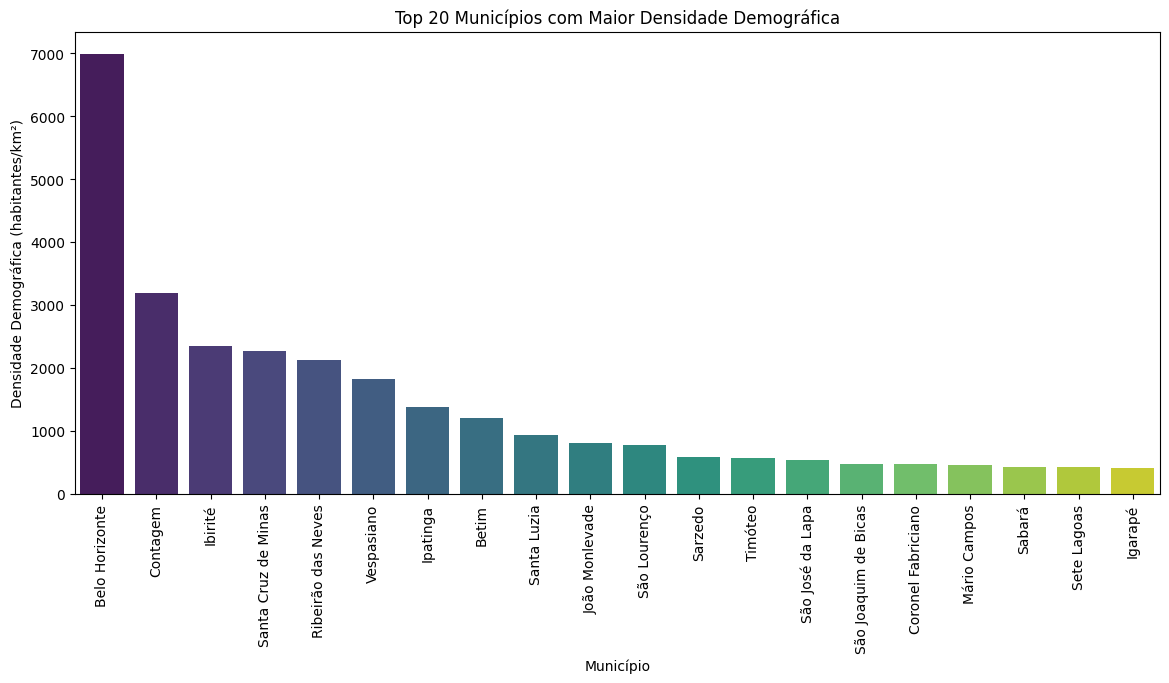

In [48]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_mg_municipios_v6.sort_values('densidade_demografica', ascending=False).head(20),
            x='municipio', y='densidade_demografica', palette='viridis')
plt.title('Top 20 Municípios com Maior Densidade Demográfica')
plt.xticks(rotation=90)
plt.xlabel('Município')
plt.ylabel('Densidade Demográfica (habitantes/km²)')
plt.show()

### 5.2. Receitas vs Despesas Brutas por Município

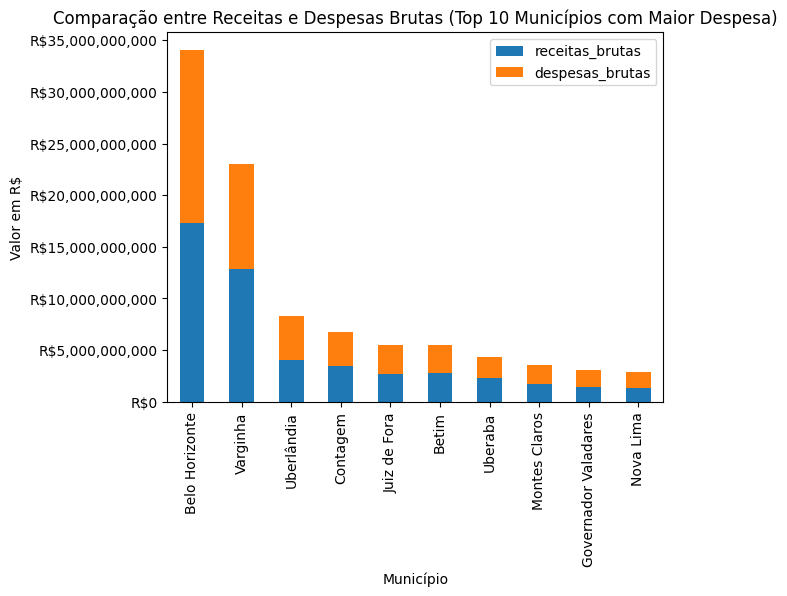

In [49]:
top_10_municipios = df_mg_municipios_v6.sort_values(by='despesas_brutas', ascending=False).head(10)

ax = top_10_municipios[['municipio', 'receitas_brutas', 'despesas_brutas']].plot(kind='bar', stacked=True)

plt.title('Comparação entre Receitas e Despesas Brutas (Top 10 Municípios com Maior Despesa)')
plt.xlabel('Município')
plt.ylabel('Valor em R$')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'R${x:,.0f}'))

plt.xticks(ticks=range(len(top_10_municipios)), labels=top_10_municipios['municipio'], rotation=90)

plt.show()

### 5.3. Mapa da Escolarização de Minas Gerais (HTML)

In [50]:
import pandas as pd
from pathlib import Path
import os
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from src.classes.buscador_coordenadas import BuscadorCoordenadas
from src.classes.coordenada_municipio import CoordenadaMunicipio
from src.classes.gerador_mapa import GeradorMapa

In [51]:
buscador = BuscadorCoordenadas()
coordenadas = buscador.processar_cidades(df_mg_municipios_v6)

Iniciando busca de coordenadas...
Processando cidade 10 de 853
Processando cidade 20 de 853
Processando cidade 30 de 853
Processando cidade 40 de 853
Processando cidade 50 de 853
Processando cidade 60 de 853
Processando cidade 70 de 853
Processando cidade 80 de 853
Processando cidade 90 de 853
Processando cidade 100 de 853
Processando cidade 110 de 853
Processando cidade 120 de 853
Processando cidade 130 de 853
Processando cidade 140 de 853
Processando cidade 150 de 853
Processando cidade 160 de 853
Processando cidade 170 de 853
Processando cidade 180 de 853
Processando cidade 190 de 853
Processando cidade 200 de 853
Processando cidade 210 de 853
Processando cidade 220 de 853
Processando cidade 230 de 853
Processando cidade 240 de 853
Processando cidade 250 de 853
Processando cidade 260 de 853
Processando cidade 270 de 853
Processando cidade 280 de 853
Processando cidade 290 de 853
Processando cidade 300 de 853
Processando cidade 310 de 853
Processando cidade 320 de 853
Processando cid

In [55]:
print(coordenadas)

[CoordenadaMunicipio(municipio='Abadia dos Dourados', latitude=-18.4911191, longitude=-47.4063589, escolarizacao=np.float64(98.3)), CoordenadaMunicipio(municipio='Abaeté', latitude=-19.1566833, longitude=-45.4481213, escolarizacao=np.float64(99.8)), CoordenadaMunicipio(municipio='Abre Campo', latitude=-20.295421, longitude=-42.480131, escolarizacao=np.float64(97.4)), CoordenadaMunicipio(municipio='Acaiaca', latitude=-20.3621646, longitude=-43.1444162, escolarizacao=np.float64(96.0)), CoordenadaMunicipio(municipio='Açucena', latitude=-19.073056, longitude=-42.546666, escolarizacao=np.float64(96.7)), CoordenadaMunicipio(municipio='Água Boa', latitude=-17.9956411, longitude=-42.3899261, escolarizacao=np.float64(92.9)), CoordenadaMunicipio(municipio='Água Comprida', latitude=-20.0574733, longitude=-48.1093074, escolarizacao=np.float64(95.2)), CoordenadaMunicipio(municipio='Aguanil', latitude=-20.9424533, longitude=-45.3927152, escolarizacao=np.float64(97.4)), CoordenadaMunicipio(municipio=

In [56]:
df_coodenadas = pd.DataFrame([vars(m) for m in coordenadas])

In [58]:
df_coodenadas

,municipio,latitude,longitude,escolarizacao
0,Abadia dos Dourados,-18.491119,-47.406359,98.3
1,Abaeté,-19.156683,-45.448121,99.8
2,Abre Campo,-20.295421,-42.480131,97.4
3,Acaiaca,-20.362165,-43.144416,96.0
4,Açucena,-19.073056,-42.546666,96.7
...,...,...,...,...
848,Virginópolis,-18.822612,-42.705397,98.2
849,Virgolândia,-18.476014,-42.306919,98.4
850,Visconde do Rio Branco,-21.010000,-42.840833,97.5
851,Volta Grande,-21.770834,-42.539166,98.0


In [61]:
df_coodenadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   municipio      853 non-null    object 
 1   latitude       853 non-null    float64
 2   longitude      853 non-null    float64
 3   escolarizacao  853 non-null    float64
dtypes: float64(3), object(1)
memory usage: 26.8+ KB


In [ ]:
df_coodenadas.to_csv(path + 'coordenadas_mg.csv', index=False)

In [62]:
for coord in coordenadas:
    municipio_dados = df_mg_municipios_v6[
        df_mg_municipios_v6['municipio'] == coord.municipio
    ].iloc[0]
    coord.escolarizacao = municipio_dados['escolarizacao_6_14_anos']

In [66]:
data_dir = Path('../data')
data_dir.mkdir(exist_ok=True)

In [69]:
gerador = GeradorMapa(coordenadas)
mapa = gerador.criar_mapa()
mapa.save(data_dir / 'mapa_escolarizacao_mg.html')

### 5.4. Mapa da Escolarização de Minas Gerais (Plotly)

In [72]:
df_coodenadas_mg = pd.read_csv(path + 'coordenadas_mg.csv')

In [73]:
# Configurar template do mapa
template = 'plotly_dark'

## 6. Exportação de Resultados

---

### 6.1. Salvar DataFrame Processado

In [ ]:
df_mg_municipios_v10.to_csv(path + 'municipios_habitantes_processado.csv', index=False)